In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Each row of the dataset is a single game with the following features (in the order in the vector):
- 1 Team won the game (1 or -1)
- 2 Cluster ID (related to location)
- 3 Game mode (eg All Pick)
- 4 Game type (eg. Ranked)
- 5 to end.: Each element is an indicator for a hero. Value of 1 indicates that a player from team '1' played as that hero and '-1' for the other team. Hero can be selected by only one player each game. This means that each row has five '1' and five '-1' values.


In [35]:
path = 'dota2Dataset/dota2Train.csv'

In [36]:
train_df = pd.read_csv(path)

In [37]:
train_df

,-1,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
5,1,224,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-1,227,8,3,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,111,2,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,-1,151,2,2,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,145,2,3,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [38]:
train_df.describe()

,-1,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
count,92649.000000,92649.000000,92649.000000,92649.000000,92649.000000,92649.000000,92649.000000,92649.000000,92649.000000,92649.000000,...,92649.000000,92649.000000,92649.000000,92649.000000,92649.0,92649.000000,92649.000000,92649.000000,92649.000000,92649.000000
mean,0.053050,175.863636,3.317586,2.384591,-0.001630,-0.000971,0.000691,-0.000799,-0.002008,0.003173,...,-0.001371,-0.000950,0.000885,0.000594,0.0,0.001025,0.000648,-0.000227,-0.000043,0.000896
std,0.998597,35.658070,2.633081,0.486834,0.402006,0.467674,0.165053,0.355395,0.329349,0.483952,...,0.535027,0.206113,0.283987,0.155941,0.0,0.220704,0.204167,0.168708,0.189869,0.139034
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
train_df = train_df.rename(index=str, columns={'-1': 'Result', '223': 'Cluster ID', '2': 'Game mode', '2.1': 'Game type'})

In [40]:
train_df

,Result,Cluster ID,Game mode,Game type,0,0.1,0.2,0.3,0.4,0.5,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
5,1,224,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-1,227,8,3,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,111,2,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,-1,151,2,2,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,145,2,3,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0


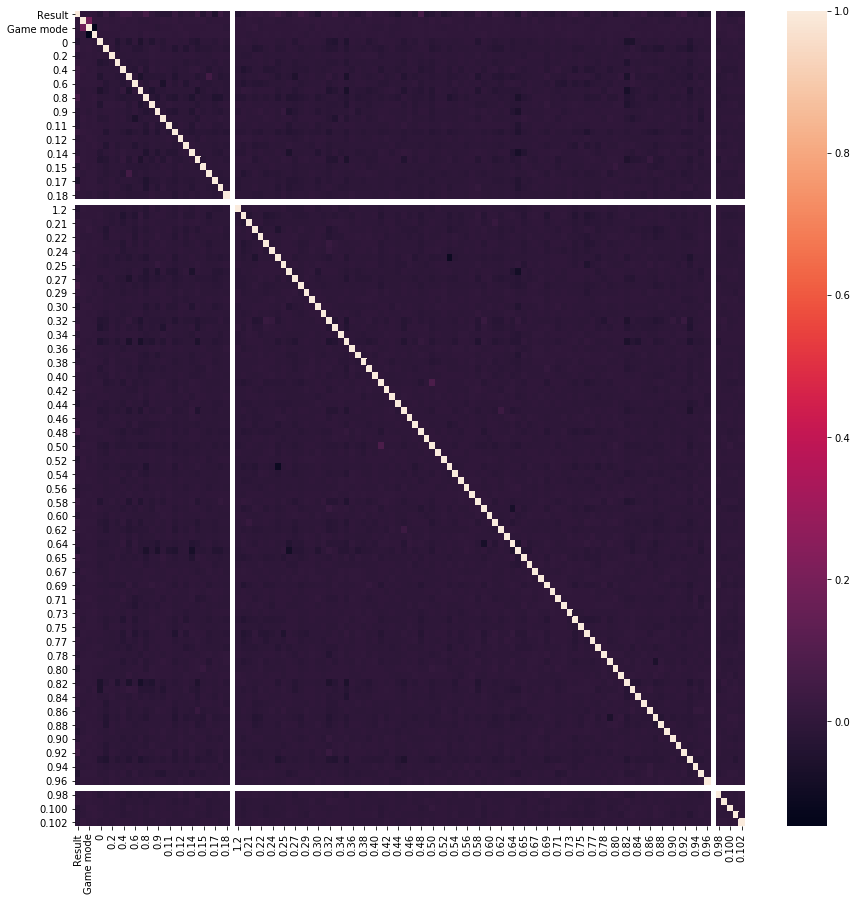

In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
correlation_matrix = train_df.corr(method='pearson')
# Create a heatmap using sns.linearmodels.corrplot(), or sns.heatmap().  If you use .heatmap(), you'll need to 
# create a correlation matrix by using np.corrcoef() on your data.  
# make a plot of specified dimension (in inches), just a 1x1 subplot
fig, ax = plt.subplots(figsize=(15, 15))
# pass the axis to draw on
sns.heatmap(correlation_matrix, ax=ax)

In [8]:
label = train_df[['Result']]
train_df = train_df.drop("Result", axis=1)

In [9]:
train_df.shape

(92649, 116)

In [11]:
scaler = StandardScaler()
scaler.fit(train_df)
scaled_X = scaler.transform(train_df)

pca = PCA()
pca.fit(scaled_X)
X_with_pca = pca.transform(scaled_X)

In [12]:
for ind, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance for Principal Component {}: {}".format(ind, var))

Explained Variance for Principal Component 0: 0.010922693801322344
Explained Variance for Principal Component 1: 0.010226861984193201
Explained Variance for Principal Component 2: 0.01003583808789829
Explained Variance for Principal Component 3: 0.010010429505414834
Explained Variance for Principal Component 4: 0.00986714574846502
Explained Variance for Principal Component 5: 0.009837487027503105
Explained Variance for Principal Component 6: 0.009778573277048485
Explained Variance for Principal Component 7: 0.009734574883490962
Explained Variance for Principal Component 8: 0.009672403178043647
Explained Variance for Principal Component 9: 0.009656113218090411
Explained Variance for Principal Component 10: 0.009624161188594087
Explained Variance for Principal Component 11: 0.009586280987787283
Explained Variance for Principal Component 12: 0.009568621014120406
Explained Variance for Principal Component 13: 0.009527981463556826
Explained Variance for Principal Component 14: 0.00950307088

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_df, label, test_size=0.3)

In [14]:
original_y_train = y_train
modify_y_train = y_train

In [15]:
# turn -1 to 0
for i in range(len(modify_y_train.iloc[:,0])):
    if modify_y_train.iloc[:,0][i] == -1:
        modify_y_train.iloc[:,0][i] = 0

In [16]:
modify_y_train

,Result
9350,0
63194,0
37880,1
19351,1
63293,0
62237,0
91362,1
69297,1
42069,1
39521,0


In [17]:
original_y_test = y_test
modify_y_test = y_test

In [18]:
# turn -1 to 0
for i in range(len(modify_y_test.iloc[:,0])):
    if modify_y_test.iloc[:,0][i] == -1:
        modify_y_test.iloc[:,0][i] = 0

In [19]:
modify_y_test

,Result
61667,0
14307,1
88918,1
68002,1
8817,0
32129,0
87869,1
43878,1
78450,1
19395,1


In [20]:
# num_classes = 2
# modify_y_train = keras.utils.to_categorical(modify_y_train, num_classes)
# modify_y_test = keras.utils.to_categorical(modify_y_test, num_classes)

In [21]:
num_columns = len(list(train_df.columns.values))
num_columns

116

In [22]:
model = Sequential()
model.add(Dense(num_columns, activation="sigmoid", input_shape=(num_columns,)))
model.add(Dense(256, activation="sigmoid"))
model.add(Dense(256, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 116)               13572     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               29952     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 109,573
Trainable params: 109,573
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, modify_y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, modify_y_test))

Train on 64854 samples, validate on 27795 samples
Epoch 1/10
64854/64854 [==============================] - 8s 128us/step - loss: 0.6942 - acc: 0.5194 - val_loss: 0.6753 - val_acc: 0.5668
Epoch 2/10
64854/64854 [==============================] - 8s 126us/step - loss: 0.6740 - acc: 0.5796 - val_loss: 0.7139 - val_acc: 0.5144
Epoch 3/10
64854/64854 [==============================] - 8s 120us/step - loss: 0.6711 - acc: 0.5857 - val_loss: 0.6676 - val_acc: 0.5895
Epoch 4/10
64854/64854 [==============================] - 8s 124us/step - loss: 0.6701 - acc: 0.5876 - val_loss: 0.6636 - val_acc: 0.5988
Epoch 5/10
64854/64854 [==============================] - 8s 123us/step - loss: 0.6691 - acc: 0.5885 - val_loss: 0.6626 - val_acc: 0.6003
Epoch 6/10
64854/64854 [==============================] - 8s 126us/step - loss: 0.6687 - acc: 0.5904 - val_loss: 0.6622 - val_acc: 0.6009
Epoch 7/10
64854/64854 [==============================] - 9s 141us/step - loss: 0.6680 - acc: 0.5919 - val_loss: 0.6630 - 

In [24]:
# turn -1 to 0
for i in range(len(original_y_train.iloc[:,0])):
    if original_y_train.iloc[:,0][i] == 0:
        original_y_train.iloc[:,0][i] = -1

In [25]:
original_y_train

,Result
9350,-1
63194,-1
37880,1
19351,1
63293,-1
62237,-1
91362,1
69297,1
42069,1
39521,-1


In [26]:
for i in range(len(original_y_test.iloc[:,0])):
    if original_y_test.iloc[:,0][i] == 0:
        original_y_test.iloc[:,0][i] = -1

In [27]:
original_y_test

,Result
61667,-1
14307,1
88918,1
68002,1
8817,-1
32129,-1
87869,1
43878,1
78450,1
19395,1


In [28]:
model_ = Sequential()
model_.add(Dense(num_columns, activation="tanh", input_shape=(num_columns,)))
model_.add(Dense(256, activation="tanh"))
model_.add(Dense(256, activation="tanh"))
model_.add(Dense(1, activation="sigmoid"))
model_.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 116)               13572     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               29952     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 109,573
Trainable params: 109,573
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_.fit(X_train, original_y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, original_y_test))

Train on 64854 samples, validate on 27795 samples
Epoch 1/10
64854/64854 [==============================] - 9s 137us/step - loss: -0.1426 - acc: 0.0055 - val_loss: 0.1085 - val_acc: 0.0000e+00
Epoch 2/10
64854/64854 [==============================] - 9s 133us/step - loss: -0.4632 - acc: 0.0093 - val_loss: -0.5935 - val_acc: 0.0000e+00
Epoch 3/10
64854/64854 [==============================] - 8s 116us/step - loss: -0.5809 - acc: 0.0061 - val_loss: -0.0816 - val_acc: 0.0000e+00
Epoch 4/10
64854/64854 [==============================] - 8s 121us/step - loss: -0.6693 - acc: 0.0071 - val_loss: -0.2320 - val_acc: 0.0000e+00
Epoch 5/10
64854/64854 [==============================] - 8s 116us/step - loss: -0.3738 - acc: 0.0034 - val_loss: -0.5918 - val_acc: 0.0000e+00
Epoch 6/10
64854/64854 [==============================] - 8s 117us/step - loss: -0.6219 - acc: 0.0134 - val_loss: -0.6957 - val_acc: 0.0000e+00
Epoch 7/10
64854/64854 [==============================] - 8s 118us/step - loss: -0.6896

In [30]:
test_path = 'dota2Dataset/dota2Test.csv'

In [31]:
test_df = pd.read_csv(test_path)

In [32]:
test_df

,-1,223,8,2,0,-1.1,0.1,0.2,0.3,0.4,...,-1.5,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,231,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
5,1,152,2,2,0,0,0,0,0,-1,...,0,1,0,0,0,0,0,0,0,0
6,-1,153,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,223,8,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,153,2,2,0,0,0,0,-1,1,...,0,0,0,0,0,0,0,0,0,0
9,-1,133,9,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test_label = test_df[['-1']]
test_data = test_df.drop(['-1'], axis=1)

In [ ]:
test_data

In [ ]:
model_.fit(clean_train_df, label, batch_size=64, epochs=10, verbose=1, validation_data=(test_data, test_label))

In [ ]:
for i in range(len(label.iloc[:,0])):
    if label.iloc[:,0][i] == -1:
        label.iloc[:,0][i] = 0

In [ ]:
for i in range(len(test_label.iloc[:,0])):
    if test_label.iloc[:,0][i] == -1:
        test_label.iloc[:,0][i] = 0

In [ ]:
model.fit(clean_train_df, label, batch_size=64, epochs=10, verbose=1, validation_data=(test_data, test_label))